In [106]:
%matplotlib inline

In [1]:
import pandas as pd

In [50]:
data = pd.read_csv("AmesHousing.txt", delimiter = "\t")


In [4]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
data.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


In [49]:
train = data[0:1460]
test = data[1460:]


In [8]:
target = 'SalePrice'

In [9]:
import matplotlib.pyplot as plt


In [98]:
import seaborn as sns

In [11]:
fig = plt.figure(figsize = (7,15))

In [14]:
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

In [16]:
train.plot(x = 'Garage Area', y ='SalePrice', ax = ax1, kind = "scatter")

In [18]:
train.plot(x = "Gr Liv Area", y = 'SalePrice', ax = ax2, kind = 'scatter')

In [19]:
train.plot(x = "Overall Cond", y = 'SalePrice', ax = ax3, kind = 'scatter')

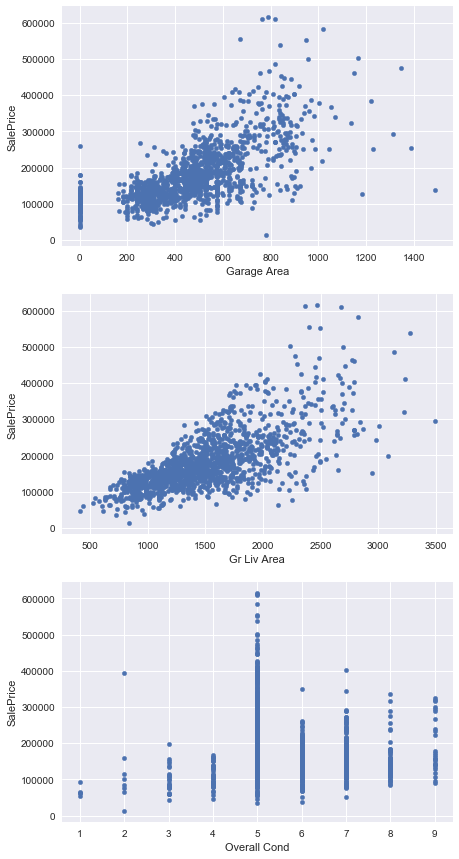

In [20]:
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(lr.coef_)
print(lr.intercept_)

[ 116.86624683]
5366.82171006


In [29]:
import numpy as np

In [30]:
from sklearn.metrics import mean_squared_error

In [54]:
train_predictions = lr.predict(train[["Gr Liv Area"]])
test_predictions = lr.predict(test[["Gr Liv Area"]])

In [55]:
train_mse = mean_squared_error(train_predictions, train["SalePrice"])

In [56]:
test_mse = mean_squared_error(test_predictions, test["SalePrice"])

In [57]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [58]:
print(train_rmse)
print(test_rmse)

56034.3620014
57088.2516126


In [59]:
#multiple linear regression

In [60]:
cols = ['Overall Cond', 'Gr Liv Area']

In [61]:
lr.fit(train[cols], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

In [63]:
train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

In [64]:
print(train_rmse_2)
print(test_rmse_2)

56032.3980153
57066.9077945


In [67]:
########################################################################################################################

In [86]:
train['Yr Sold'].dtype

dtype('int64')

In [91]:
numerical_train = train.select_dtypes(include= ['float64', 'int64'])
numerical_train = numerical_train.drop(['PID','Year Built','Year Remod/Add','Garage Yr Blt','Mo Sold', 'Yr Sold'], axis = 1)

In [92]:
null_series = numerical_train.isnull().sum()

In [94]:
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


In [95]:
train_subset = train[full_cols_series.index]

In [96]:
correlation_matrix = train_subset.corr()
sorted_corr = correlation_matrix['SalePrice'].abs().sort_values()

In [97]:
print(sorted_corr)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


In [99]:
plt.figure(figsize=(10,6))

In [100]:
good_corr = sorted_corr[sorted_corr > 0.3]

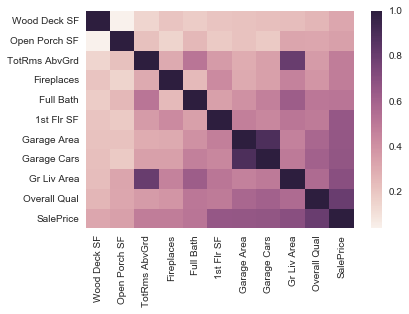

In [107]:
correlation_matrix = train_subset[good_corr.index].corr()
sns.heatmap(correlation_matrix)
